### Time Series Cross Validation:

### Steps used in this Algorithm:

1. Import Required Libraries

2. Create Sample Time Series Data

3. Create Lag Features

4. Time Series Cross-Validation Setup

5. Train & Validate Using TimeSeriesSplit

6. Average Cross-Validation Performance

7. Visualize Train-Test Split

### Step 1:  Import Required Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Step 2:  Create Sample Time Series Data

In [52]:
np.random.seed(42)

date_range = pd.date_range(start="2020-01-01", periods=200, freq="D")

data = pd.DataFrame({
    "Date": date_range,
    "Value": np.cumsum(np.random.randn(200)) + 50
})

data.set_index("Date", inplace=True)


In [53]:
data.sort_values(by="Date")

,Value
Date,
2020-01-01,50.496714
2020-01-02,50.358450
2020-01-03,51.006138
2020-01-04,52.529168
2020-01-05,52.295015
...,...
2020-07-14,43.660701
2020-07-15,42.776843
2020-07-16,42.930569


### OBSERVATIONS:

1. The above dataset contains the Value collected at the every day.

### Step 3: Create Lag Features

In [54]:
def create_lag_features(df, lags=3):
    df_copy = df.copy()
    for lag in range(1, lags + 1):
        df_copy[f"lag_{lag}"] = df_copy["Value"].shift(lag)
    return df_copy.dropna()


In [55]:
df_lagged = create_lag_features(data, lags=5)

X = df_lagged.drop("Value", axis=1)
y = df_lagged["Value"]


### Step 4: Time Series Cross-Validation Setup

In [56]:
tscv = TimeSeriesSplit(n_splits=5)

### Step 5: Train & Validate Using TimeSeriesSplit

In [57]:
mae_scores = []
rmse_scores = []

fold = 1

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_scores.append(mae)
    rmse_scores.append(rmse)

    print(f"Fold {fold}")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print("-" * 30)

    fold += 1


Fold 1
MAE  : 0.7719
RMSE : 0.9416
------------------------------
Fold 2
MAE  : 0.6896
RMSE : 0.9436
------------------------------
Fold 3
MAE  : 0.8028
RMSE : 1.0383
------------------------------
Fold 4
MAE  : 0.7502
RMSE : 0.8993
------------------------------
Fold 5
MAE  : 0.6496
RMSE : 0.8697
------------------------------


### Step 6:  Average Cross-Validation Performance

In [58]:
print("Average MAE :", np.mean(mae_scores))
print("Average RMSE:", np.mean(rmse_scores))


Average MAE : 0.7327862005097925
Average RMSE: 0.9385205759199193


### Step 7: Visualize Train-Test Split

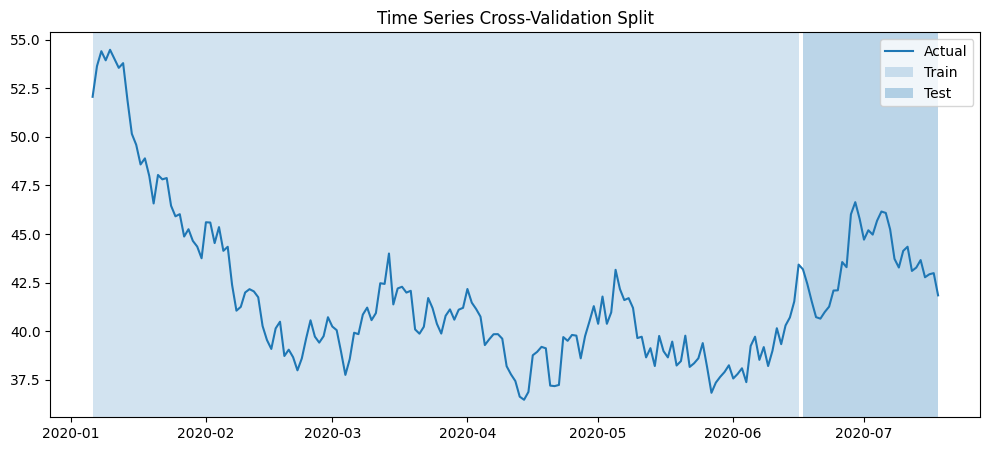

In [59]:
plt.figure(figsize=(12, 5))
plt.plot(y, label="Actual")

plt.axvspan(
    X.index[train_index][0],
    X.index[train_index][-1],
    alpha=0.2,
    label="Train"
)

plt.axvspan(
    X.index[test_index][0],
    X.index[test_index][-1],
    alpha=0.3,
    label="Test"
)

plt.legend()
plt.title("Time Series Cross-Validation Split")
plt.show()


### OBSERVATIONS:

1.  Time Series Cross-Validation is used when data has a time order.

2.  Shuffling is NOT allowed (prevents future data leakage).

3.  Training data always comes before validation data.

4.  It Uses expanding window or rolling window approach.

5.  Implemented in Python using TimeSeriesSplit from sklearn.